In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sns.set(font='NanumBarunGothic', font_scale=2.5)
sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('주문.csv')
df2 = pd.read_csv('고객.csv')
df3 = pd.read_csv('품명.csv')

In [3]:
df1

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.0,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.0,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.0,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.0,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.0,8423,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
668106,1523874368,정상회원,1.0,166554,2022-10-25,2022-10-26,2022-10-26,0,0,NaN,오전 01:00,100022543V2_1912
668107,402835520,정상회원,1.0,12635,2022-10-29,2022-10-29,2022-10-30,0,0,NaN,오전 01:00,10002432V2_327
668108,402835520,정상회원,1.0,7849,2022-10-29,2022-10-29,2022-10-29,0,0,NaN,오전 01:00,100022317V2_1725
668109,1544381312,정상회원,1.0,7275,2022-11-02,2022-11-02,2022-11-03,6270,0,NaN,오전 01:00,10002723V2_563


In [4]:
df1.columns

Index(['회원번호', '회원상태', '구매수량', '구매금액', '주문일시', '배송시작일', '배송완료일', '사용 적립금',
       '사용 포인트 네이버', '주문취소여부', '주문시간', '제품번호'],
      dtype='object')

<Axes: >

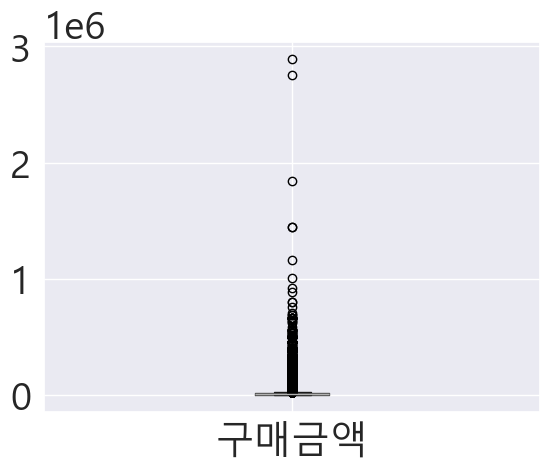

In [5]:
df1.boxplot(['구매금액'])

array([[<Axes: title={'center': '구매금액'}>]], dtype=object)

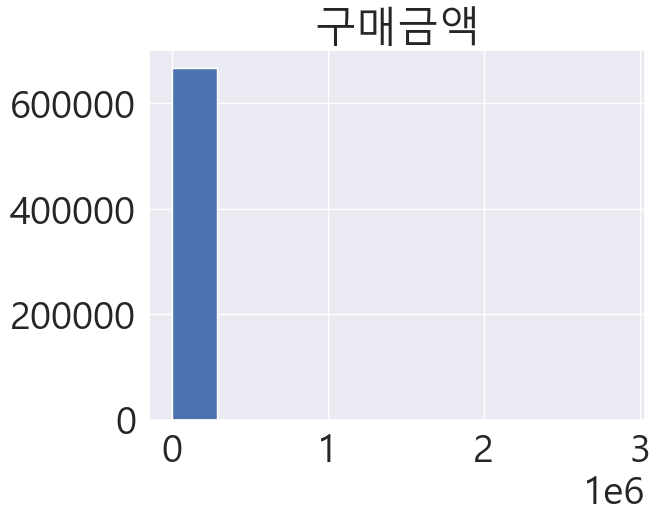

In [6]:
df1.hist(['구매금액'])

In [7]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [8]:
df1.describe()

,회원번호,구매수량,구매금액,사용 적립금,사용 포인트 네이버
count,668111.000,668111.000,668111.000,668111.000,668111.000
mean,740526259.232,1.192,11821.966,256.007,74.556
std,431259017.392,0.694,17049.920,1501.949,2723.138
min,18764160.000,0.050,184.000,0.000,0.000
25%,384696832.000,1.000,4212.000,0.000,0.000
50%,745377024.000,1.000,7658.000,0.000,0.000
75%,1052064320.000,1.000,13784.000,0.000,0.000
max,1670620864.000,75.000,2890766.000,98260.000,251600.000


In [9]:
df1[df1['구매금액'] >= 2890766]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
566807,153723200,정상회원,10.000,2890766,2022-07-29,2022-07-29,2022-07-30,0,0,NaN,오전 07:44,10002609V2_473


# 데이터 전부 merge

In [11]:
df1

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337
1,1032097472,정상회원,1.000,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,오후 12:60,100022137V2_1606
2,1032097472,정상회원,1.000,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,100021452V2_1113
3,369152832,정상회원,1.000,16655,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,10002931V2_708
4,1032097472,정상회원,1.000,8423,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559
...,...,...,...,...,...,...,...,...,...,...,...,...
668106,1523874368,정상회원,1.000,166554,2022-10-25,2022-10-26,2022-10-26,0,0,NaN,오전 01:00,100022543V2_1912
668107,402835520,정상회원,1.000,12635,2022-10-29,2022-10-29,2022-10-30,0,0,NaN,오전 01:00,10002432V2_327
668108,402835520,정상회원,1.000,7849,2022-10-29,2022-10-29,2022-10-29,0,0,NaN,오전 01:00,100022317V2_1725
668109,1544381312,정상회원,1.000,7275,2022-11-02,2022-11-02,2022-11-03,6270,0,NaN,오전 01:00,10002723V2_563


In [12]:
df1.isnull().sum()

회원번호               0
회원상태               2
구매수량               0
구매금액               0
주문일시               0
배송시작일          30635
배송완료일          30635
사용 적립금             0
사용 포인트 네이버         0
주문취소여부        637476
주문시간               0
제품번호               0
dtype: int64

In [13]:
df2

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,NaN,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,NaN,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구
...,...,...,...,...,...,...,...,...,...
12535,1644957952,정상회원,여,34,신한은행,미혼,False,부산광역시,중구
12536,1645334720,정상회원,남,24,국민카드,미혼,False,전라남도,여수시
12537,1670400000,탈퇴,남,28,연결앱결제,NaN,False,대구광역시,북구
12538,1670606016,정상회원,남,19,하나은행,미혼,NaN,경상남도,밀양시


In [14]:
df_merge = pd.merge(df1, df2, on = '회원번호', how = 'inner')
df_merge

,회원번호,회원상태_x,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,회원상태_y,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
1,1032097472,정상회원,1.000,29865,2022-01-08,2022-01-08,2022-01-08,0,0,NaN,오후 12:60,100022137V2_1606,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
2,1032097472,정상회원,1.000,23164,2022-01-08,2022-01-08,2022-01-09,0,0,NaN,오후 12:60,100021452V2_1113,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
3,1032097472,정상회원,1.000,8423,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
4,1032097472,정상회원,1.000,12061,2022-10-17,2022-10-17,2022-10-18,0,0,NaN,오후 12:42,100022213V2_1666,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668106,1621767232,탈퇴,1.000,15124,2022-08-22,2022-08-22,2022-08-22,0,0,NaN,오전 01:01,100022231V2_1681,탈퇴,여,47,국민은행,기혼,True,서울특별시,마포구
668107,1621767232,탈퇴,3.000,14932,2022-08-22,2022-08-23,2022-08-23,0,0,NaN,오전 01:01,10002632V2_492,탈퇴,여,47,국민은행,기혼,True,서울특별시,마포구
668108,1621767232,탈퇴,1.000,11869,2022-08-22,2022-08-23,2022-08-23,0,0,NaN,오전 01:01,10002694V2_546,탈퇴,여,47,국민은행,기혼,True,서울특별시,마포구
668109,1501851072,정상회원,1.000,17038,2022-07-12,2022-07-12,2022-07-13,0,0,NaN,오전 01:00,100022054V2_1539,정상회원,여,33,신한카드,기혼,True,충청남도,서산시


In [15]:
df3

,제품번호,물품명,물품대분류,물품중분류,상품중량
0,100021V2_0,2단무늬컵,식기/편백,자기,1p
1,100022V2_1,7곡딸기롤과자,과자,스낵,100g/10개입
2,100023V2_2,7곡참식,식사대용,선식/생식,700g
3,100024V2_3,가리비,생물수산,패류/갑각류,1.5kg
4,100025V2_3,가리비,생물수산,패류/갑각류,1kg
...,...,...,...,...,...
2544,100022545V2_1913,흑임자구름떡,떡,즉석떡,180g
2545,100022546V2_1914,흑임자인절미,떡,즉석떡,150g
2546,100022547V2_1915,흑토마토,과일채소,완숙토마토,1kg
2547,100022548V2_1915,흑토마토,과일채소,완숙토마토,1kg/소


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df_merge = pd.merge(df_merge, df3, on = '제품번호', how = 'inner')
df_merge

,회원번호,회원상태_x,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,회원상태_y,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
1,1032097472,정상회원,1.000,10338,2022-09-16,2022-09-17,2022-09-18,0,0,NaN,오후 10:01,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
2,1032097472,정상회원,1.000,10338,2022-06-18,2022-06-18,2022-06-18,0,0,NaN,오후 08:00,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
3,1032097472,정상회원,1.000,10338,2022-04-02,2022-04-02,2022-04-02,0,0,NaN,오후 07:40,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
4,1032097472,정상회원,1.000,8615,2022-05-07,2022-05-07,2022-05-08,0,0,NaN,오후 03:29,100021783V2_1337,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668106,734192768,정상회원,1.000,30631,2022-05-01,2022-05-02,2022-05-03,0,0,NaN,오전 12:40,10002947V2_720,정상회원,여,35,BC카드,기혼,False,울산광역시,울주군,불고기구이판,식기/편백,옹기,NaN
668107,1352610112,정상회원,1.000,122523,2022-10-31,2022-10-31,2022-10-31,0,0,NaN,오전 02:26,100021658V2_1239,정상회원,남,28,국민은행,기혼,False,경상남도,창원시,옻칠 주발모음,식기/편백,옻칠,선물
668108,1556603072,정상회원,1.000,56475,2022-10-29,2022-10-29,2022-10-31,0,0,NaN,오전 08:02,10002186V2_150,정상회원,여,47,롯데카드,미혼,NaN,전라남도,영광군,국화차모음,차,잎꽃차,"20g,0.6g*20티백"
668109,686955712,정상회원,1.000,109122,2022-06-12,2022-06-13,2022-06-13,0,0,NaN,오전 08:51,100022260V2_1695,정상회원,남,65,연결앱결제,미혼,False,부산광역시,금정구,편백나무큐브목베개모음,식기/편백,편백,2개


# merge할때, 잘못 합쳐진거 삭제 및 수정

In [19]:
df_merge = df_merge.drop(['회원상태_y'], axis = 1)
df_merge

,회원번호,회원상태_x,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
1,1032097472,정상회원,1.000,10338,2022-09-16,2022-09-17,2022-09-18,0,0,NaN,오후 10:01,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
2,1032097472,정상회원,1.000,10338,2022-06-18,2022-06-18,2022-06-18,0,0,NaN,오후 08:00,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
3,1032097472,정상회원,1.000,10338,2022-04-02,2022-04-02,2022-04-02,0,0,NaN,오후 07:40,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
4,1032097472,정상회원,1.000,8615,2022-05-07,2022-05-07,2022-05-08,0,0,NaN,오후 03:29,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668106,734192768,정상회원,1.000,30631,2022-05-01,2022-05-02,2022-05-03,0,0,NaN,오전 12:40,10002947V2_720,여,35,BC카드,기혼,False,울산광역시,울주군,불고기구이판,식기/편백,옹기,NaN
668107,1352610112,정상회원,1.000,122523,2022-10-31,2022-10-31,2022-10-31,0,0,NaN,오전 02:26,100021658V2_1239,남,28,국민은행,기혼,False,경상남도,창원시,옻칠 주발모음,식기/편백,옻칠,선물
668108,1556603072,정상회원,1.000,56475,2022-10-29,2022-10-29,2022-10-31,0,0,NaN,오전 08:02,10002186V2_150,여,47,롯데카드,미혼,NaN,전라남도,영광군,국화차모음,차,잎꽃차,"20g,0.6g*20티백"
668109,686955712,정상회원,1.000,109122,2022-06-12,2022-06-13,2022-06-13,0,0,NaN,오전 08:51,100022260V2_1695,남,65,연결앱결제,미혼,False,부산광역시,금정구,편백나무큐브목베개모음,식기/편백,편백,2개


In [20]:
df_merge = df_merge.rename(columns = {'회원상태_x' : '회원상태'})
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
1,1032097472,정상회원,1.000,10338,2022-09-16,2022-09-17,2022-09-18,0,0,NaN,오후 10:01,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
2,1032097472,정상회원,1.000,10338,2022-06-18,2022-06-18,2022-06-18,0,0,NaN,오후 08:00,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
3,1032097472,정상회원,1.000,10338,2022-04-02,2022-04-02,2022-04-02,0,0,NaN,오후 07:40,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
4,1032097472,정상회원,1.000,8615,2022-05-07,2022-05-07,2022-05-08,0,0,NaN,오후 03:29,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668106,734192768,정상회원,1.000,30631,2022-05-01,2022-05-02,2022-05-03,0,0,NaN,오전 12:40,10002947V2_720,여,35,BC카드,기혼,False,울산광역시,울주군,불고기구이판,식기/편백,옹기,NaN
668107,1352610112,정상회원,1.000,122523,2022-10-31,2022-10-31,2022-10-31,0,0,NaN,오전 02:26,100021658V2_1239,남,28,국민은행,기혼,False,경상남도,창원시,옻칠 주발모음,식기/편백,옻칠,선물
668108,1556603072,정상회원,1.000,56475,2022-10-29,2022-10-29,2022-10-31,0,0,NaN,오전 08:02,10002186V2_150,여,47,롯데카드,미혼,NaN,전라남도,영광군,국화차모음,차,잎꽃차,"20g,0.6g*20티백"
668109,686955712,정상회원,1.000,109122,2022-06-12,2022-06-13,2022-06-13,0,0,NaN,오전 08:51,100022260V2_1695,남,65,연결앱결제,미혼,False,부산광역시,금정구,편백나무큐브목베개모음,식기/편백,편백,2개


# 데이터 확인

In [22]:
df_merge.isnull().sum()

회원번호               0
회원상태               2
구매수량               0
구매금액               0
주문일시               0
배송시작일          30635
배송완료일          30635
사용 적립금             0
사용 포인트 네이버         0
주문취소여부        637476
주문시간               0
제품번호               0
성별                 2
나이                 0
등록카드             148
결혼            149131
구독여부          119967
주소지              122
세부주소지            592
물품명                0
물품대분류              0
물품중분류              0
상품중량           15376
dtype: int64

# 주문취소
- 주문취소는 배송시작일, 배송완료일이 없음
- 주문취소랑 주문완료 두개인거 같음 null값 주문완료로 변경

In [24]:
df_merge[df_merge['주문취소여부'] == '주문취소']

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
24,438814080,정상회원,1.000,13401,2022-10-21,NaN,NaN,0,0,주문취소,오전 02:32,100021783V2_1337,여,61,국민은행,미혼,NaN,세종특별자치시,조치원읍,유정란/친환경,알,논지엠오유정란,10알
26,438814080,정상회원,1.000,10338,2022-09-07,NaN,NaN,0,0,주문취소,오전 01:24,100021783V2_1337,여,61,국민은행,미혼,NaN,세종특별자치시,조치원읍,유정란/친환경,알,논지엠오유정란,10알
28,869925760,정상회원,1.000,7083,2022-03-11,NaN,NaN,0,0,주문취소,오후 12:41,100021783V2_1337,여,44,우리은행,미혼,NaN,서울특별시,마포구,유정란/친환경,알,논지엠오유정란,10알
52,401781312,정상회원,1.000,7083,2022-03-26,NaN,NaN,0,0,주문취소,오전 12:12,100021783V2_1337,여,36,롯데카드,기혼,False,경기도,안성시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668014,153723200,정상회원,4.000,581982,2022-11-06,NaN,NaN,0,0,주문취소,오후 12:13,100021814V2_1355,여,44,연결앱결제,NaN,False,경상남도,창원시,인삼/수삼,뿌리채소,인삼,1채:750g
668018,550242752,정상회원,1.000,4786,2022-01-17,NaN,NaN,0,0,주문취소,오후 02:48,10002522V2_402,여,34,하나은행,미혼,False,전라북도,군산시,된장찌개솥뚜껑,식기/편백,옹기,NaN
668057,761498240,정상회원,1.000,33502,2022-01-20,NaN,NaN,0,0,주문취소,오후 11:19,10002638V2_497,남,42,롯데카드,기혼,NaN,경기도,하남시,막사발1호,식기/편백,옹기,5개
668064,153723200,정상회원,5.000,1445383,2022-06-07,NaN,NaN,0,0,주문취소,오전 07:30,10002609V2_473,여,44,연결앱결제,NaN,False,경상남도,창원시,린테우스상황버섯,버섯,상황버섯,200g/유


In [25]:
df_merge[df_merge['주문취소여부'] == '주문취소'].isnull().sum()

회원번호              0
회원상태              0
구매수량              0
구매금액              0
주문일시              0
배송시작일         30635
배송완료일         30635
사용 적립금            0
사용 포인트 네이버        0
주문취소여부            0
주문시간              0
제품번호              0
성별                0
나이                0
등록카드              6
결혼             6899
구독여부           5636
주소지               5
세부주소지            29
물품명               0
물품대분류             0
물품중분류             0
상품중량            696
dtype: int64

In [26]:
df_merge['주문취소여부'].fillna('주문완료', inplace = True)

In [27]:
df_merge['주문취소여부'].value_counts()

주문취소여부
주문완료    637476
주문취소     30635
Name: count, dtype: int64

# 성별

In [29]:
df_merge[df_merge['성별'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
300380,1527053696,정상회원,1.000,10146,2022-02-03,2022-02-05,2022-02-06,0,0,주문완료,오전 11:35,10002949V2_722,NaN,37,농협중앙회,NaN,False,충청남도,아산시,불고기양념소시지,육가공,햄/소시지/훈제,300g
651033,1527053696,정상회원,1.000,8998,2022-02-03,2022-02-03,2022-02-03,0,0,주문완료,오전 11:35,10002488V2_373,NaN,37,농협중앙회,NaN,False,충청남도,아산시,돈육곡물소시지,육가공,햄/소시지/훈제,300g-


# 등록카드

In [31]:
df_merge[df_merge['등록카드'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
25969,1320827968,정상회원,2.000,14167,2022-01-29,2022-01-29,2022-01-30,0,0,주문완료,오후 08:04,100021783V2_1337,남,53,NaN,미혼,True,울산광역시,동구,유정란/친환경,알,논지엠오유정란,10알
25970,1320827968,정상회원,1.000,10338,2022-10-19,2022-10-19,2022-10-19,0,0,주문완료,오후 07:45,100021783V2_1337,남,53,NaN,미혼,True,울산광역시,동구,유정란/친환경,알,논지엠오유정란,10알
26204,407677824,정상회원,1.000,13401,2022-11-02,2022-11-02,2022-11-02,0,0,주문완료,오후 06:26,100021783V2_1337,여,42,NaN,NaN,True,충청남도,아산시,유정란/친환경,알,논지엠오유정란,10알
27076,582100992,정상회원,1.000,7083,2022-03-14,2022-03-16,2022-03-18,0,0,주문완료,오전 02:39,100021783V2_1337,여,54,NaN,기혼,False,경기도,시흥시,유정란/친환경,알,논지엠오유정란,10알
29332,489005888,정상회원,1.000,8423,2022-08-29,2022-08-29,2022-08-30,0,0,주문완료,오후 02:15,100022085V2_1559,여,40,NaN,미혼,False,부산광역시,금정구,채도라지,뿌리채소,도라지/손질,150g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659330,407677824,정상회원,1.000,15315,2022-10-28,2022-10-29,2022-10-31,0,0,주문완료,오전 12:07,100021856V2_1387,여,42,NaN,NaN,True,충청남도,아산시,자연그대로 립스틱,화장품,색조화장품,코랄오렌지
661319,378722368,정상회원,1.000,38288,2022-01-29,2022-01-29,2022-01-30,0,0,주문완료,오후 10:53,100021865V2_1395,여,42,NaN,NaN,False,광주광역시,서구,자연그대로 아이크림,화장품,기초화장품,NaN
663503,378722368,정상회원,1.000,47860,2022-07-30,2022-07-30,2022-08-01,0,0,주문완료,오후 07:26,10002628V2_488,여,42,NaN,NaN,False,광주광역시,서구,마늘환,건강일반,분말/환,180g
664585,378722368,정상회원,1.000,48818,2022-02-20,2022-02-20,2022-02-21,0,0,주문완료,오후 05:59,100021251V2_949,여,42,NaN,NaN,False,광주광역시,서구,수피아 기초2종모음/기존용기,화장품,기초화장품,NaN


# 결혼
- 결혼 결측치는 149131개로 전체에서 22%정도 차지함
- 미혼자가 결측치로 있는 것도 아님

In [33]:
df_merge['결혼'].value_counts()

결혼
기혼    266696
미혼    252284
Name: count, dtype: int64

In [34]:
df_merge[df_merge['결혼'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
11,441813376,정상회원,1.000,13401,2022-09-11,2022-09-11,2022-09-13,0,0,주문완료,오후 12:43,100021783V2_1337,여,49,연결앱결제,NaN,NaN,경기도,남양주시,유정란/친환경,알,논지엠오유정란,10알
12,441813376,정상회원,1.000,10338,2022-08-31,2022-08-31,2022-08-31,0,0,주문완료,오후 10:59,100021783V2_1337,여,49,연결앱결제,NaN,NaN,경기도,남양주시,유정란/친환경,알,논지엠오유정란,10알
13,441813376,정상회원,1.000,7083,2022-02-12,2022-02-12,2022-02-13,0,0,주문완료,오후 08:17,100021783V2_1337,여,49,연결앱결제,NaN,NaN,경기도,남양주시,유정란/친환경,알,논지엠오유정란,10알
14,441813376,정상회원,1.000,10338,2022-11-01,2022-11-01,2022-11-01,0,0,주문완료,오후 08:12,100021783V2_1337,여,49,연결앱결제,NaN,NaN,경기도,남양주시,유정란/친환경,알,논지엠오유정란,10알
15,441813376,정상회원,2.000,14167,2022-01-23,2022-01-23,2022-01-24,0,0,주문완료,오후 06:05,100021783V2_1337,여,49,연결앱결제,NaN,NaN,경기도,남양주시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668091,348824064,정상회원,1.000,126351,2022-09-11,2022-09-11,2022-09-11,0,0,주문완료,오전 05:43,100021467V2_1123,여,58,우리은행,NaN,False,대구광역시,달서구,양수냄비/24㎝,식기/편백,스테인리스,NaN
668094,1103627712,정상회원,1.000,127309,2022-06-28,2022-06-28,2022-06-29,0,0,주문완료,오후 02:56,10002770V2_591,여,41,연결앱결제,NaN,False,부산광역시,연제구,무쇠미니팬,식기/편백,무쇠,NaN
668097,745046656,정상회원,1.000,51689,2022-08-13,2022-08-13,2022-08-14,0,0,주문완료,오전 12:05,100021727V2_1293,여,34,신한은행,NaN,NaN,경기도,성남시,유기 어린이수저세트,식기/편백,전통유기,NaN
668098,745046656,정상회원,1.000,51689,2022-08-02,2022-08-03,2022-08-05,0,0,주문완료,오전 11:58,100021727V2_1293,여,34,신한은행,NaN,NaN,경기도,성남시,유기 어린이수저세트,식기/편백,전통유기,NaN


In [35]:
149131 / len(df_merge)

0.22321290923214854

# 구독여부 확인
- 구독여부는 False, True, null값으로 구성됨
- 구독여부 null값은 우짜지...

In [37]:
df_merge['구독여부'].value_counts()

구독여부
False    453819
True      94325
Name: count, dtype: int64

In [38]:
df_merge['구독여부'].isnull().sum()

119967

In [39]:
453819 + 94325 + 119967

668111

# 주소지

In [41]:
df_merge[df_merge['주소지'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
15370,585788864,정상회원,1.000,10338,2022-07-13,2022-07-13,2022-07-14,0,0,주문완료,오후 03:38,100021783V2_1337,여,29,신한카드,기혼,NaN,NaN,NaN,유정란/친환경,알,논지엠오유정란,10알
26365,221849536,정상회원,1.000,8615,2022-05-09,2022-05-09,2022-05-11,0,0,주문완료,오전 04:25,100021783V2_1337,여,62,기업은행,NaN,NaN,NaN,NaN,유정란/친환경,알,논지엠오유정란,10알
30488,1352146112,정상회원,1.000,12061,2022-10-31,2022-10-31,2022-11-02,0,0,주문완료,오전 04:01,100022213V2_1666,여,30,농협중앙회,NaN,False,NaN,NaN,튀김옷돈가스,육가공,돈가스/분쇄가공,400g
51137,585788864,정상회원,1.000,2776,2022-07-22,2022-07-23,2022-07-24,0,0,주문완료,오후 12:44,10002527V2_406,여,29,신한카드,기혼,NaN,NaN,NaN,두부,두부/유부,두부,420g
69691,585788864,정상회원,1.000,9955,2022-04-06,2022-04-08,2022-04-09,0,0,주문완료,오후 11:60,100021471V2_1126,여,29,신한카드,기혼,NaN,NaN,NaN,양파,양념채소,양파,10kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636369,585788864,정상회원,1.000,8577,2022-09-09,2022-09-09,2022-09-10,500,0,주문완료,오후 01:45,10002563V2_432,여,29,신한카드,기혼,NaN,NaN,NaN,등심돈가스/카레/잡채-성남용인,중량(정육),돼지(중량),NaN
636370,585788864,정상회원,1.000,8500,2022-10-19,2022-10-20,2022-10-21,0,0,주문완료,오후 01:30,10002563V2_432,여,29,신한카드,기혼,NaN,NaN,NaN,등심돈가스/카레/잡채-성남용인,중량(정육),돼지(중량),NaN
637350,585788864,정상회원,1.000,29482,2022-09-15,2022-09-15,2022-09-15,0,0,주문완료,오후 07:35,100021914V2_1434,여,29,신한카드,기혼,NaN,NaN,NaN,잣,견과,잣,220g:1병
637351,585788864,정상회원,1.000,29482,2022-04-25,2022-04-25,2022-04-26,0,0,주문완료,오후 04:12,100021914V2_1434,여,29,신한카드,기혼,NaN,NaN,NaN,잣,견과,잣,220g:1병


# 세부주소지

In [43]:
df_merge[df_merge['세부주소지'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
10397,189094848,정상회원,1.000,10338,2022-05-06,2022-05-07,2022-05-07,0,0,주문완료,오후 07:16,100021783V2_1337,여,43,국민은행,미혼,True,세종특별자치시,NaN,유정란/친환경,알,논지엠오유정란,10알
15370,585788864,정상회원,1.000,10338,2022-07-13,2022-07-13,2022-07-14,0,0,주문완료,오후 03:38,100021783V2_1337,여,29,신한카드,기혼,NaN,NaN,NaN,유정란/친환경,알,논지엠오유정란,10알
20963,361762240,정상회원,1.000,10338,2022-09-07,2022-09-07,2022-09-08,0,0,주문완료,오후 12:21,100021783V2_1337,여,41,우리은행,기혼,False,세종특별자치시,NaN,유정란/친환경,알,논지엠오유정란,10알
20964,361762240,정상회원,1.000,13401,2022-06-30,2022-06-30,2022-06-30,0,0,주문완료,오후 12:19,100021783V2_1337,여,41,우리은행,기혼,False,세종특별자치시,NaN,유정란/친환경,알,논지엠오유정란,10알
20965,361762240,정상회원,1.000,13401,2022-07-14,2022-07-14,2022-07-14,0,0,주문완료,오후 10:34,100021783V2_1337,여,41,우리은행,기혼,False,세종특별자치시,NaN,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664011,189094848,정상회원,1.000,5552,2022-06-11,2022-06-11,2022-06-13,0,0,주문완료,오후 02:11,10002382V2_294,여,43,국민은행,미혼,True,세종특별자치시,NaN,다시마가루,수산가공,수산분말,120g
664910,361762240,정상회원,1.000,6892,2022-10-05,2022-10-05,2022-10-07,0,0,주문완료,오후 07:24,10002394V2_303,여,41,우리은행,기혼,False,세종특별자치시,NaN,다진청양고추,소스/기타양념,기타양념,180g
665273,361762240,정상회원,1.000,4786,2022-07-21,2022-07-21,2022-07-21,0,0,주문완료,오후 09:40,10002357V2_278,여,41,우리은행,기혼,False,세종특별자치시,NaN,녹차티백,차,잎꽃차,1.2g*100티백
665274,361762240,정상회원,1.000,4786,2022-08-18,2022-08-18,2022-08-20,0,0,주문완료,오전 11:08,10002357V2_278,여,41,우리은행,기혼,False,세종특별자치시,NaN,녹차티백,차,잎꽃차,1.2g*100티백


# 상품중량
- 결측치는 15376개로 0.02%정도 차지

In [45]:
df_merge[df_merge['상품중량'].isnull()]

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
160218,441813376,정상회원,2.000,49246,2022-09-04,2022-09-04,2022-09-04,0,0,주문완료,오후 11:57,10002564V2_433,여,49,연결앱결제,NaN,NaN,경기도,남양주시,등심로스-성남용인,중량(정육),한우(중량),NaN
160219,438814080,정상회원,1.000,34107,2022-05-27,2022-05-27,2022-05-27,0,0,주문완료,오후 10:30,10002564V2_433,여,61,국민은행,미혼,NaN,세종특별자치시,조치원읍,등심로스-성남용인,중량(정육),한우(중량),NaN
160220,438814080,정상회원,1.000,34107,2022-05-27,2022-05-27,2022-05-28,0,0,주문완료,오후 10:30,10002564V2_433,여,61,국민은행,미혼,NaN,세종특별자치시,조치원읍,등심로스-성남용인,중량(정육),한우(중량),NaN
160221,381879424,정상회원,1.000,19449,2022-05-29,2022-05-29,2022-05-30,0,0,주문완료,오후 06:59,10002564V2_433,여,44,신한카드,NaN,False,경기도,시흥시,등심로스-성남용인,중량(정육),한우(중량),NaN
160222,381879424,정상회원,1.000,30089,2022-09-04,2022-09-04,2022-09-05,0,0,주문완료,오후 03:23,10002564V2_433,여,44,신한카드,NaN,False,경기도,시흥시,등심로스-성남용인,중량(정육),한우(중량),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668101,1123097152,정상회원,1.000,70833,2022-05-24,2022-05-24,2022-05-24,0,0,주문완료,오후 02:50,10002230V2_177,여,26,우리은행,미혼,False,대구광역시,동구,긴독3호,식기/편백,옹기,NaN
668102,1554270080,정상회원,2.000,141667,2022-03-06,2022-03-06,2022-03-07,0,0,주문완료,오후 02:03,10002230V2_177,여,41,농협중앙회,기혼,False,경기도,평택시,긴독3호,식기/편백,옹기,NaN
668103,1554270080,정상회원,1.000,70833,2022-01-28,2022-01-29,2022-01-30,0,0,주문완료,오전 03:52,10002230V2_177,여,41,농협중앙회,기혼,False,경기도,평택시,긴독3호,식기/편백,옹기,NaN
668104,926006656,정상회원,1.000,38288,2022-04-06,2022-04-06,2022-04-07,0,0,주문완료,오후 03:32,100022017V2_1510,여,32,기업은행,기혼,False,경상북도,영덕군,찜틀/28㎝,식기/편백,스테인리스,NaN


In [46]:
15376 / len(df_merge)

0.023014139865980353

# 물품중분류 확인

In [48]:
df_merge['물품중분류'].unique()

array(['논지엠오유정란', '멥쌀', '양념육', '도라지/손질', '돈가스/분쇄가공', '열무', '콩가공/기타', '화본',
       '즉석떡', '가래떡', '단과자빵', '두부', '기타건어류', '조림', '양파', '식육추출가공', '땅콩',
       '죽', '잼', '콩', '유정란', '오이', '수산가공반찬', '냉동패류', '피자/핫도그', '송편',
       '간편요리', '소스', '멸치류', '패류/갑각류', '콩나물', '보리살림(냉장)', '찐빵,호떡,전통',
       '방울토마토', '무항생제(냉장)', '유기한우(냉장)', '황태류', '곡류차', '장류/기타', '세탁비누',
       '생물해조류', '건강차', '헤어', '햄/소시지/훈제', '뿌리차', '사과', '귤(조생)', '더덕',
       '미역/다시마', '포도(혼합포도)', '건강곡물빵', '생채', '보리살림돼지', '어류/연체류', '상추',
       '엿/양갱/기타', '아욱', '휴지', '시금치', '식사대용/기타', '곤드레나물/손질', '보리', '혼합곡',
       '김가공', '양념가루', '젓갈/액젓', '한우(중량)', '돼지(중량)', '프리믹스', '참외', '귤만감',
       '애호박', '베타쌈배추', '쌈케일', '요구르트', '어린잎채소', '스테인리스', '완숙토마토', '재래닭유정란',
       '고추장', '간편조리면', '냉동생선', '국수', '만두', '간장', '오징어류', '병조림/기타', '장아찌',
       '딸기', '땅두릅', '파이,과자,쿠키류', '곡식가루', '스낵', '기름', '푸딩', '우유/산양유', '빙과',
       '치약/칫솔', '아이스크림', '파프리카', '한우(냉장)', '수박', '된장', '산나물모음', '무', '유부',
       '브로컬리', '식빵, 식사대용', '기타냉동수산', '깐마늘', '쿠키', '밤', '당근', 

# 음식이 아닌 값

In [50]:
no_food = [
    '비누', '화장품', '용품', '소품', '화본', '비누', '핸드', '세정', '기초화장품', 
    '건강', '비누', '세안비누', '소품', '침구', '환', '영유아', '위생', '환경용품', 
    '상자', '무쇠', '옹기', '무쇠', '주방', '세탁비누', '유아', '기초화장품', '세안제', 
    '세정', '남성화장품', '살균', '기타', '기타', '소품', '황기', '성인', '자기', '색조화장품', '토종', '남성화장품', '리큐르']

# 고객생애가치 계산

In [52]:
customer_group = df_merge.groupby('회원번호').agg({'구매금액': 'sum', '구매수량': 'sum'})
customer_group

,구매금액,구매수량
회원번호,,
18764160,811902,44.000
18792000,9955,1.000
18942336,1418288,86.000
18949760,35130,2.000
19391488,3159,1.000
...,...,...
1644957952,54944,8.000
1645334720,52647,1.100
1670400000,35670095,3725.830


In [53]:
customer_group['평균구매금액'] = customer_group['구매금액'] / customer_group['구매수량']
customer_group['구매빈도'] = customer_group['구매수량'] / len(df_merge['주문일시'].unique())

In [54]:
customer_group['CLV'] = customer_group['평균구매금액'] * customer_group['구매빈도']
customer_group

,구매금액,구매수량,평균구매금액,구매빈도,CLV
회원번호,,,,,
18764160,811902,44.000,18452.318,0.149,2752.210
18792000,9955,1.000,9955.000,0.003,33.746
18942336,1418288,86.000,16491.721,0.292,4807.756
18949760,35130,2.000,17565.000,0.007,119.085
19391488,3159,1.000,3159.000,0.003,10.708
...,...,...,...,...,...
1644957952,54944,8.000,6868.000,0.027,186.251
1645334720,52647,1.100,47860.909,0.004,178.464
1670400000,35670095,3725.830,9573.731,12.630,120915.576


In [98]:
df_merge.isnull().sum()

회원번호               0
회원상태               2
구매수량               0
구매금액               0
주문일시               0
배송시작일          30635
배송완료일          30635
사용 적립금             0
사용 포인트 네이버         0
주문취소여부             0
주문시간               0
제품번호               0
성별                 2
나이                 0
등록카드             148
결혼            149131
구독여부          119967
주소지              122
세부주소지            592
물품명                0
물품대분류              0
물품중분류              0
상품중량           15376
dtype: int64

In [100]:
df_merge

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,상품중량
0,1032097472,정상회원,1.000,7083,2022-01-08,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
1,1032097472,정상회원,1.000,10338,2022-09-16,2022-09-17,2022-09-18,0,0,주문완료,오후 10:01,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
2,1032097472,정상회원,1.000,10338,2022-06-18,2022-06-18,2022-06-18,0,0,주문완료,오후 08:00,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
3,1032097472,정상회원,1.000,10338,2022-04-02,2022-04-02,2022-04-02,0,0,주문완료,오후 07:40,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
4,1032097472,정상회원,1.000,8615,2022-05-07,2022-05-07,2022-05-08,0,0,주문완료,오후 03:29,100021783V2_1337,여,39,우리은행,기혼,NaN,경기도,화성시,유정란/친환경,알,논지엠오유정란,10알
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668106,734192768,정상회원,1.000,30631,2022-05-01,2022-05-02,2022-05-03,0,0,주문완료,오전 12:40,10002947V2_720,여,35,BC카드,기혼,False,울산광역시,울주군,불고기구이판,식기/편백,옹기,NaN
668107,1352610112,정상회원,1.000,122523,2022-10-31,2022-10-31,2022-10-31,0,0,주문완료,오전 02:26,100021658V2_1239,남,28,국민은행,기혼,False,경상남도,창원시,옻칠 주발모음,식기/편백,옻칠,선물
668108,1556603072,정상회원,1.000,56475,2022-10-29,2022-10-29,2022-10-31,0,0,주문완료,오전 08:02,10002186V2_150,여,47,롯데카드,미혼,NaN,전라남도,영광군,국화차모음,차,잎꽃차,"20g,0.6g*20티백"
668109,686955712,정상회원,1.000,109122,2022-06-12,2022-06-13,2022-06-13,0,0,주문완료,오전 08:51,100022260V2_1695,남,65,연결앱결제,미혼,False,부산광역시,금정구,편백나무큐브목베개모음,식기/편백,편백,2개


In [107]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668111 entries, 0 to 668110
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   회원번호        668111 non-null  int64  
 1   회원상태        668109 non-null  object 
 2   구매수량        668111 non-null  float64
 3   구매금액        668111 non-null  int64  
 4   주문일시        668111 non-null  object 
 5   배송시작일       637476 non-null  object 
 6   배송완료일       637476 non-null  object 
 7   사용 적립금      668111 non-null  int64  
 8   사용 포인트 네이버  668111 non-null  int64  
 9   주문취소여부      668111 non-null  object 
 10  주문시간        668111 non-null  object 
 11  제품번호        668111 non-null  object 
 12  성별          668109 non-null  object 
 13  나이          668111 non-null  int64  
 14  등록카드        667963 non-null  object 
 15  결혼          518980 non-null  object 
 16  구독여부        548144 non-null  object 
 17  주소지         667989 non-null  object 
 18  세부주소지       667519 non-null  object 
 19  물품

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 주문일시를 datetime 형식으로 변환
df_merge['주문일시'] = pd.to_datetime(df_merge['주문일시'])

# Recency (가장 최근 구매일로부터의 일수)
df_recency = df_merge.groupby('회원번호')['주문일시'].max().reset_index()
df_recency.columns = ['회원번호', '최근구매일']
df_recency['Recency'] = (pd.to_datetime('today') - df_recency['최근구매일']).dt.days

df_recency.describe()

,회원번호,최근구매일,Recency
count,12540.000,12540,12540.000
mean,818856651.141,2022-08-27 09:16:08.038277632,698.614
min,18764160.000,2022-01-08 00:00:00,628.000
25%,462398272.000,2022-07-15 00:00:00,635.000
50%,775869248.000,2022-10-06 00:00:00,659.000
75%,1174002592.000,2022-10-30 00:00:00,742.000
max,1670620864.000,2022-11-06 00:00:00,930.000
std,441242841.976,NaN,83.372


In [126]:
# Frequency (구매 빈도)
df_frequency = df_merge.groupby('회원번호')['주문일시'].count().reset_index()
df_frequency.columns = ['회원번호', 'Frequency']

df_frequency.describe()

,회원번호,Frequency
count,12540.000,12540.000
mean,818856651.141,53.278
std,441242841.976,98.343
min,18764160.000,1.000
25%,462398272.000,4.000
50%,775869248.000,16.000
75%,1174002592.000,59.000
max,1670620864.000,3113.000


In [130]:
# Monetary (구매 금액 합계)
df_monetary = df_merge.groupby('회원번호')['구매금액'].sum().reset_index()
df_monetary.columns = ['회원번호', 'Monetary']

df_monetary.describe()

,회원번호,Monetary
count,12540.000,12540.000
mean,818856651.141,629855.319
std,441242841.976,1252151.561
min,18764160.000,766.000
25%,462398272.000,53508.750
50%,775869248.000,189699.000
75%,1174002592.000,665855.500
max,1670620864.000,35670095.000


In [132]:
# RFM 데이터프레임 병합
rfm = df_recency.merge(df_frequency, on='회원번호').merge(df_monetary, on='회원번호')

rfm.head()

,회원번호,최근구매일,Recency,Frequency,Monetary
0,18764160,2022-10-12,653,36,811902
1,18792000,2022-04-11,837,1,9955
2,18942336,2022-10-26,639,81,1418288
3,18949760,2022-10-06,659,2,35130
4,19391488,2022-05-25,793,1,3159


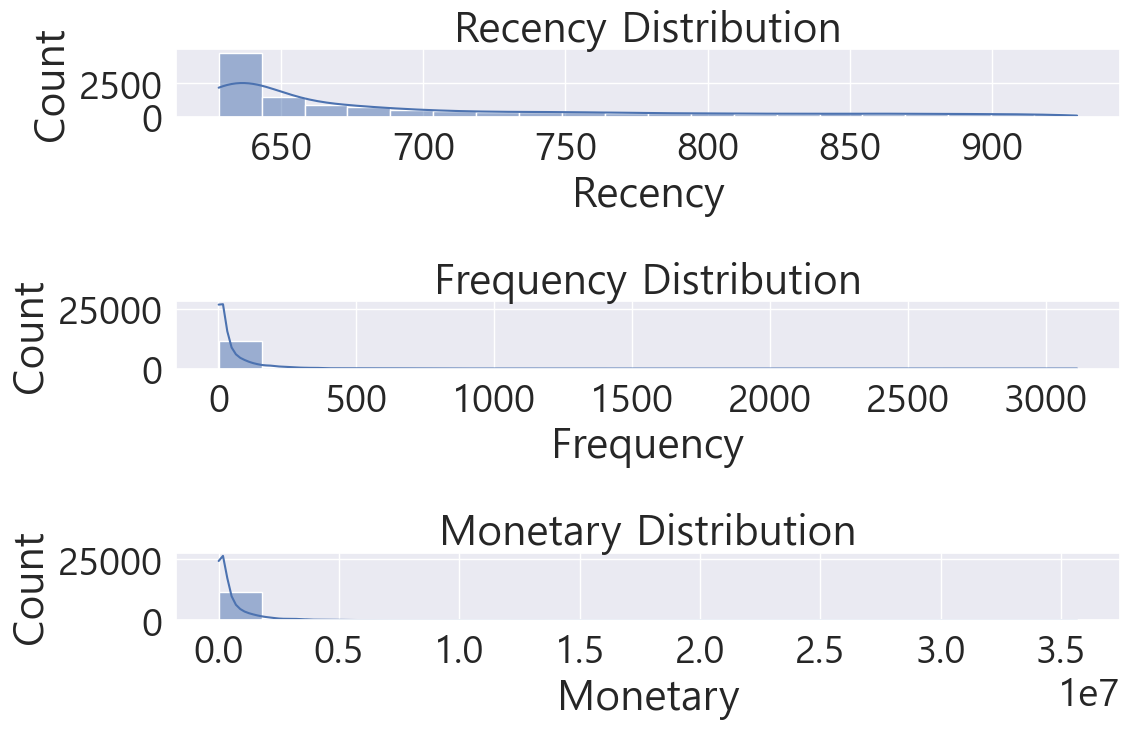

,회원번호,최근구매일,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,VIP
0,18764160,2022-10-12,653,36,811902,3,3,4,334,False
1,18792000,2022-04-11,837,1,9955,1,1,1,111,False
2,18942336,2022-10-26,639,81,1418288,3,4,4,344,False
3,18949760,2022-10-06,659,2,35130,3,1,1,311,False
4,19391488,2022-05-25,793,1,3159,1,1,1,111,False


In [136]:
# RFM 점수 계산
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, ['4', '3', '2', '1'])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, ['1', '2', '3', '4'])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, ['1', '2', '3', '4'])

# RFM 점수 합산
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# VIP 선정 (RFM 점수가 가장 높은 상위 25%)
vip_threshold = rfm['RFM_Score'].astype(int).quantile(0.75)
rfm['VIP'] = rfm['RFM_Score'].astype(int) >= vip_threshold

# VIP 고객 리스트
vip_customers = rfm[rfm['VIP'] == True]

# RFM 분석 시각화
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.histplot(rfm['Recency'], bins=20, kde=True)
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

rfm.head()


In [138]:
vip_customers

,회원번호,최근구매일,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,VIP
5,19627200,2022-11-03,631,349,4461358,4,4,4,444,True
7,19996544,2022-11-06,628,209,2825136,4,4,4,444,True
10,20588608,2022-10-30,635,495,6892801,4,4,4,444,True
12,21134272,2022-11-05,629,14,164354,4,2,2,422,True
14,21982464,2022-10-30,635,69,452469,4,4,3,443,True
...,...,...,...,...,...,...,...,...,...,...
12518,1641643136,2022-11-06,628,11,100699,4,2,2,422,True
12529,1644172864,2022-11-03,631,5,222933,4,2,3,423,True
12532,1644705536,2022-11-05,629,5,62601,4,2,2,422,True
12535,1644957952,2022-11-05,629,6,54944,4,2,2,422,True
